# NFL Analysis

#### Import Packages

In [8]:
import sqlite3
import pandas as pd
import sqlalchemy 
import matplotlib.pyplot as plt
import seaborn as sb
%load_ext sql

%sql sqlite:///football.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: None@football.db'

In [9]:
%sql sqlite:///football.db

'Connected: None@football.db'

### Import 2016 Team Data for Merge

In [10]:
#Reading in our hosted CSV file
team_2016=pd.read_csv("Team_2016_data.csv",header=0,sep=';',names=['TM','Games','Points_Scored','Yards_Gained','Num_Plays','Yards_per_Play','Turnovers_Lost','Fumbles_Lost','First_Down'])

#Checking the output is what we expect
print(team_2016.head())
print(team_2016.dtypes)


                     TM  Games  Points_Scored  Yards_Gained  Num_Plays  \
0       Atlanta Falcons     16            540          6653        995   
1    New Orleans Saints     16            469          6816       1105   
2  New England Patriots     16            441          6180       1056   
3     Green Bay Packers     16            432          5900       1029   
4        Dallas Cowboys     16            421          6027       1010   

   Yards_per_Play  Turnovers_Lost  Fumbles_Lost  First_Down  
0             6.7              11             4         379  
1             6.2              24             9         395  
2             5.9              11             9         351  
3             5.7              17             9         349  
4             6.0              15             9         358  
TM                 object
Games               int64
Points_Scored       int64
Yards_Gained        int64
Num_Plays           int64
Yards_per_Play    float64
Turnovers_Lost      int64
F

### Convert DataFrame to SQL Table

we created an empty table to insert our data into

In [11]:
%%sql
drop table if exists TeamStats2016;
CREATE TABLE TeamStats2016(
    TM TEXT Not Null,
    Games INTEGER default NULL,
    Points_Scored INTEGER default NULL,
    Yards_Gained INTEGER default NULL,
    Num_Plays INTEGER default NULL,
    Yards_per_Play INTEGER default NULL,
    Turnovers_Lost INTEGER default NULL,
    Fumbles_Lost INTEGER default NULL,
    First_Down INTEGER default NULL
);

Done.
Done.


[]

In [12]:
#Creating a variable to conenct to database
conn = sqlite3.connect('football.db')

#Converting our dataframe and sending to SQL
team_2016.to_sql('TeamStats2016',conn,if_exists='append',index=False)

Displaying the table to check for errors

In [13]:
%%sql
SELECT *
FROM TeamStats2016;

Done.


TM,Games,Points_Scored,Yards_Gained,Num_Plays,Yards_per_Play,Turnovers_Lost,Fumbles_Lost,First_Down
Atlanta Falcons,16,540,6653,995,6.7,11,4,379
New Orleans Saints,16,469,6816,1105,6.2,24,9,395
New England Patriots,16,441,6180,1056,5.9,11,9,351
Green Bay Packers,16,432,5900,1029,5.7,17,9,349
Dallas Cowboys,16,421,6027,1010,6,15,9,358
Arizona Cardinals,16,418,5868,1086,5.4,28,11,368
Oakland Raiders,16,416,5973,1048,5.7,14,7,333
Indianapolis Colts,16,411,5830,1037,5.6,22,7,351
Los Angeles Chargers,16,410,5708,1014,5.6,35,14,340
Pittsburgh Steelers,16,399,5962,1026,5.8,18,3,336


Creating Merged table that hosts everything we need for analysis

In [15]:
%%sql
drop table if exists Teams_Merge;
CREATE TABLE Teams_Merge AS
SELECT  TID,
        TeamName,
        Conference,
        Division,
        T.SCORE as Score_week_1,
        T.Total_Yards as Total_Yards_W1,
        T.Turn_Overs as Turn_Overs_W1,
        T.First_Downs as First_Downs_W1,
        T16.Games as Games_2016,
        T16.Points_Scored as Points_Scored_2016,
        T16.Yards_Gained as Yards_Gained_2016,
        T16.Num_Plays as Num_plays_2016,
        T16.Yards_per_Play as Yards_per_Play_2016,
        T16.Turnovers_Lost as Turnovers_Lost_2016,
        T16.Fumbles_Lost as Fumbles_Lost_2016,
        T16.First_Down as First_Down_2016
FROM Teams
JOIN TeamStats2016 T16 on TeamName = TM
JOIN GAMESTATISTICS T on TID = TeamID
;

Done.
Done.


[]

Checking output

In [16]:
%%sql
SELECT * FROM Teams_Merge

Done.


TID,TeamName,Conference,Division,Score_week_1,Total_Yards_W1,Turn_Overs_W1,First_Downs_W1,Games_2016,Points_Scored_2016,Yards_Gained_2016,Num_plays_2016,Yards_per_Play_2016,Turnovers_Lost_2016,Fumbles_Lost_2016,First_Down_2016
25,Denver Broncos,AFC,West,21,307,3,21,16,333,5169,1020,5.1,25,14,290
22,Carolina Panthers,NFC,South,20,333,1,21,16,369,5499,1052,5.2,29,10,318
21,Atlanta Falcons,NFC,South,24,374,0,19,16,540,6653,995,6.7,11,4,379
24,Tampa Bay Buccaneers,NFC,South,31,371,1,20,16,354,5542,1066,5.2,27,9,340
4,New York Jets,AFC,East,31,340,1,22,16,275,5268,1003,5.3,34,9,291
10,Cincinnati Bengals,AFC,North,31,381,1,18,16,325,5711,1050,5.4,17,9,341
23,New Orleans Saints,NFC,South,34,507,1,27,16,469,6816,1105,6.2,24,9,395
28,Oakland Raiders,AFC,West,35,486,0,25,16,416,5973,1048,5.7,14,7,333
26,Kansas City Chiefs,AFC,West,33,413,1,26,16,389,5488,990,5.5,17,9,305
27,Los Angeles Chargers,AFC,West,27,388,0,25,16,410,5708,1014,5.6,35,14,340


In [17]:
# Taking the new Teams Table out of SQL
mteams_2016_rs=%sql select * from Teams_Merge
mteams_2016 = mteams_2016_rs.DataFrame()

Done.


In [18]:
# Checking output
print(mteams_2016.head())
print(mteams_2016.dtypes)

   TID              TeamName Conference Division  Score_week_1  \
0   25        Denver Broncos        AFC     West            21   
1   22     Carolina Panthers        NFC    South            20   
2   21       Atlanta Falcons        NFC    South            24   
3   24  Tampa Bay Buccaneers        NFC    South            31   
4    4         New York Jets        AFC     East            31   

   Total_Yards_W1  Turn_Overs_W1  First_Downs_W1  Games_2016  \
0             307              3              21          16   
1             333              1              21          16   
2             374              0              19          16   
3             371              1              20          16   
4             340              1              22          16   

   Points_Scored_2016  Yards_Gained_2016  Num_plays_2016  Yards_per_Play_2016  \
0                 333               5169            1020                  5.1   
1                 369               5499            1052

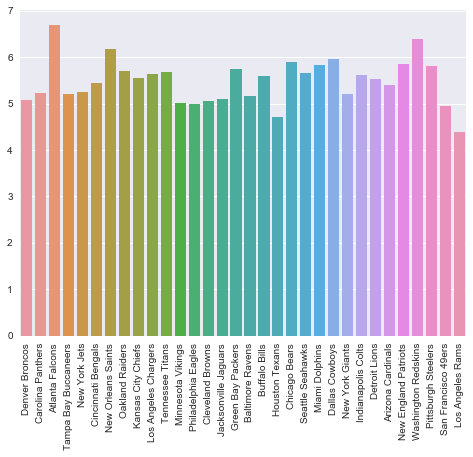

In [19]:
# Creating plot to show average yard per play
f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
mteams_2016['Average_Yards_per_Play'] = mteams_2016.Yards_Gained_2016/mteams_2016.Num_plays_2016

x = mteams_2016['TeamName'].values
y1 = mteams_2016['Average_Yards_per_Play'].values
sb.barplot(x, y1,ax=ax1)
plt.xticks(rotation=90)

plt.show()

As we can see, Atlanta Falcons have the highest yard gainage per play in the 2016 season, followed by New England Patriats. Neither the Eagles or the Steelers made the top three.